In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,mean_squared_error,r2_score,accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sns.set_style("whitegrid")

In [19]:
data = pd.read_csv("nigeria_houses_data.csv")

In [20]:
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [21]:
data = data[data["price"] < 1000000000]

## Exploratory Data Analysis

In [22]:
data["state"].value_counts()

state
Lagos          17941
Abuja           3403
Ogun             637
Oyo              477
Rivers           436
Imo              246
Anambara         144
Enugu            128
Edo              100
Delta             61
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Nasarawa           9
Kwara              9
Kogi               8
Cross River        2
Plateau            2
Kano               2
Katsina            2
Bayelsa            2
Borno              2
Niger              1
Name: count, dtype: int64

<Axes: xlabel='state'>

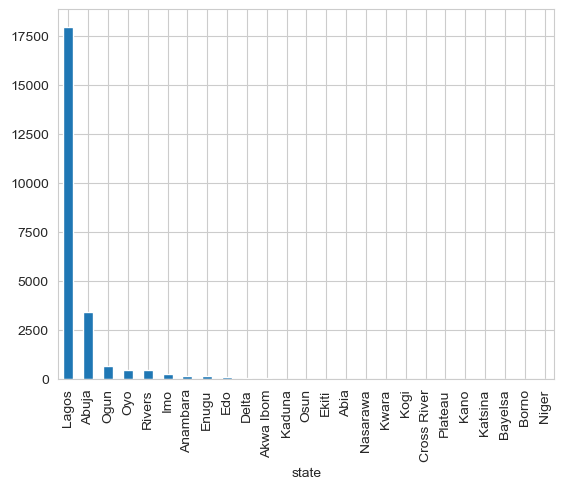

In [23]:
data["state"].value_counts().plot(kind="bar")

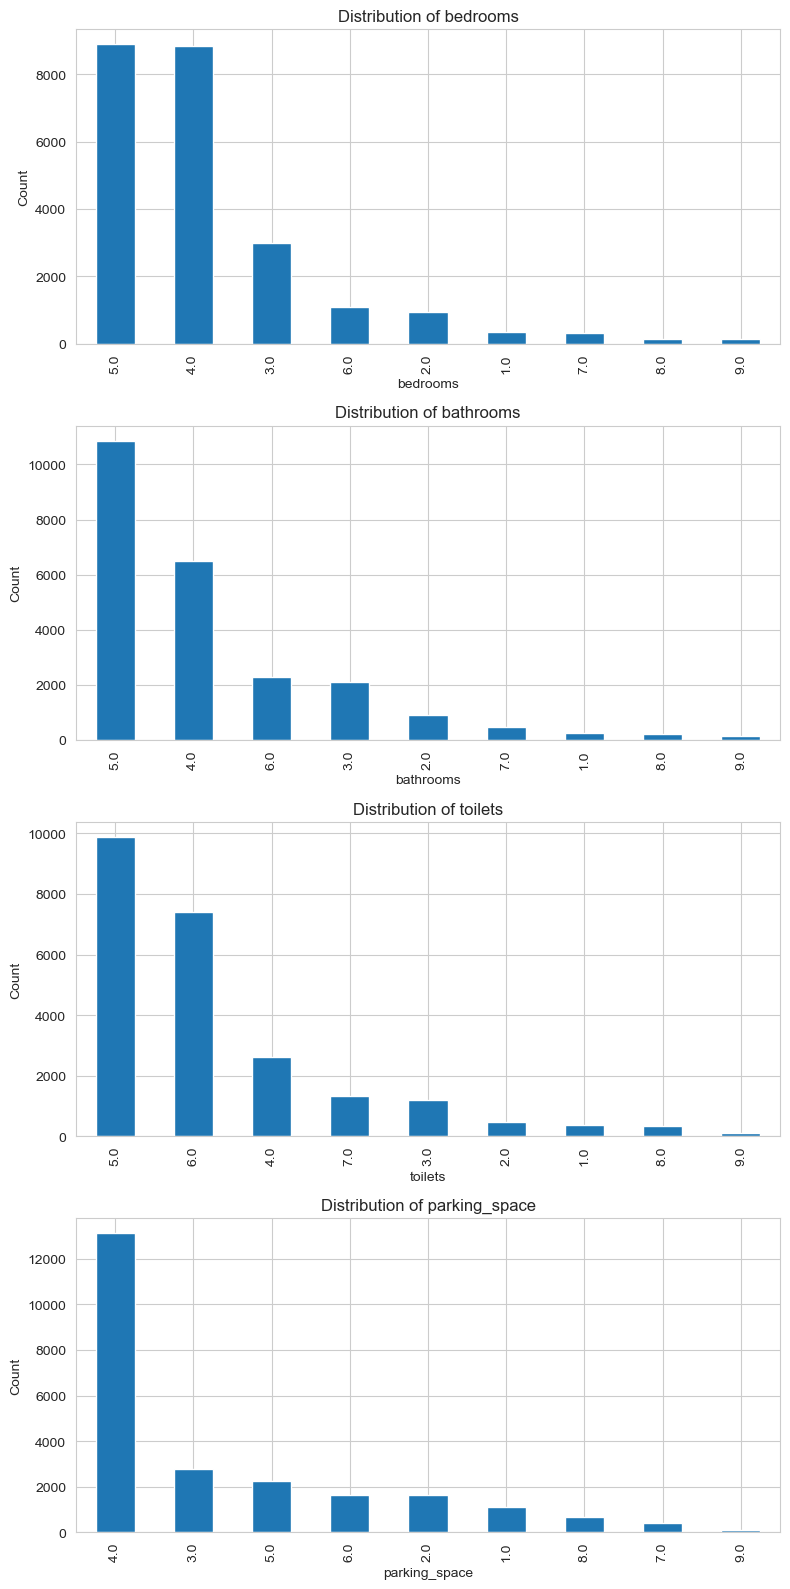

In [24]:
housing_variables = ["bedrooms", "bathrooms", "toilets", "parking_space"]

fig, axes = plt.subplots(len(housing_variables), 1, figsize=(8, 4 * len(housing_variables)))

for i, var in enumerate(housing_variables):
    data[var].value_counts().plot(kind="bar", ax=axes[i])
    axes[i].set_title(f"Distribution of {var}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

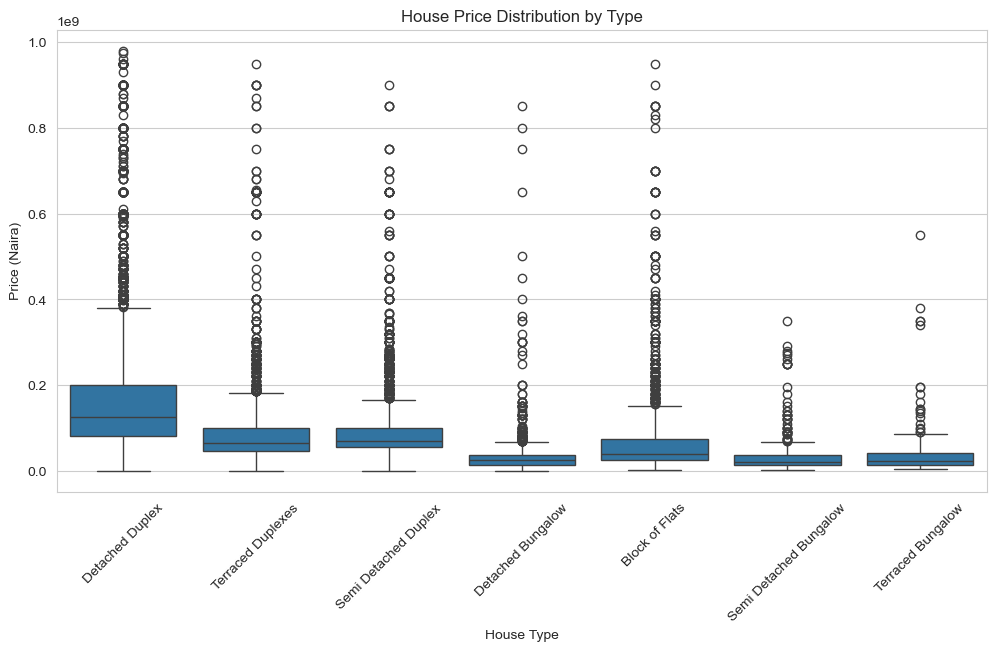

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="title", y="price", data=data)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("House Price Distribution by Type")
plt.xlabel("House Type")
plt.ylabel("Price (Naira)")
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Detached Duplex'),
  Text(1, 0, 'Terraced Duplexes'),
  Text(2, 0, 'Semi Detached Duplex'),
  Text(3, 0, 'Detached Bungalow'),
  Text(4, 0, 'Block of Flats'),
  Text(5, 0, 'Semi Detached Bungalow'),
  Text(6, 0, 'Terraced Bungalow')])

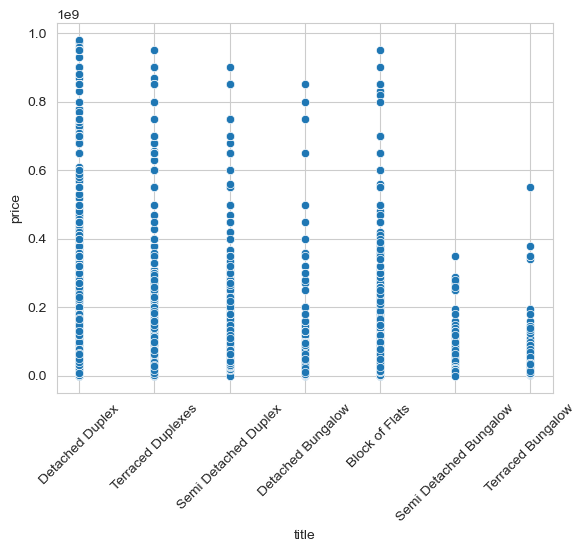

In [26]:
sns.scatterplot(data=data,x='title',y='price')
plt.xticks(rotation=45)

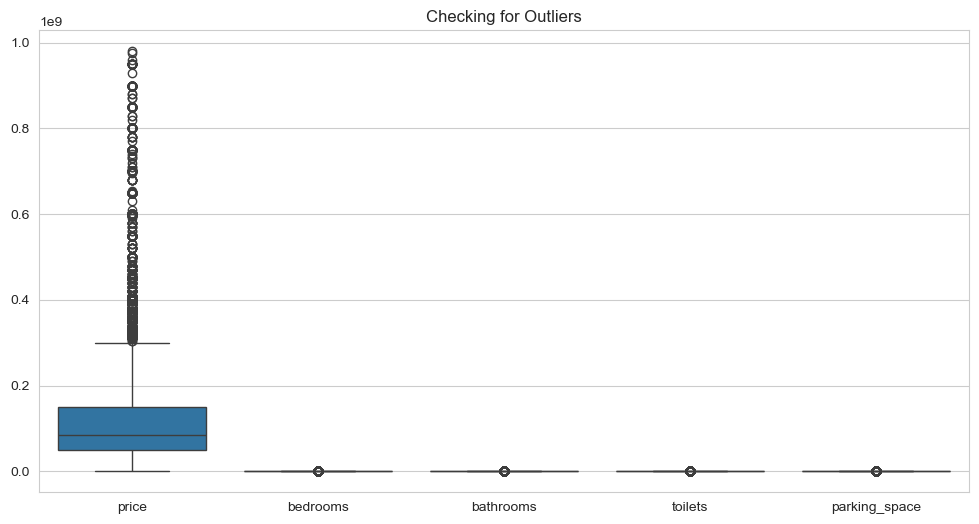

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[["price", "bedrooms", "bathrooms", "toilets", "parking_space"]])
plt.title("Checking for Outliers")
plt.show()

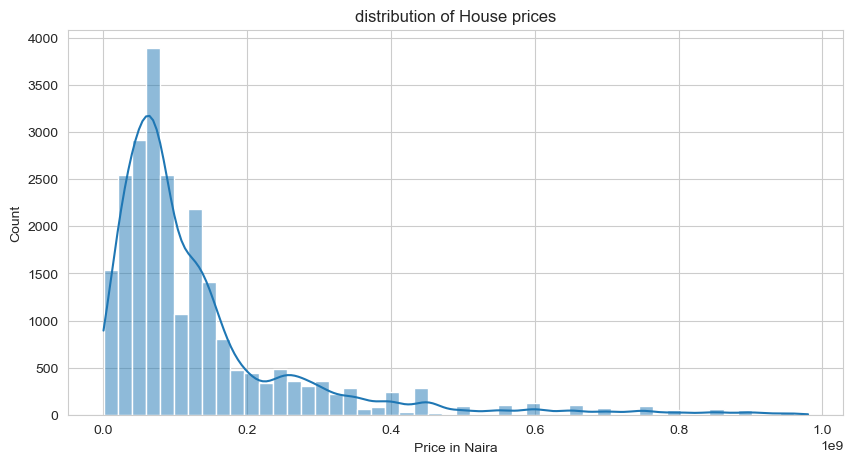

In [28]:
# Seeing the price distribution

plt.figure(figsize=(10, 5))
sns.histplot(data["price"], bins=50, kde=True)
plt.title("distribution of House prices")
plt.xlabel("Price in Naira")
plt.show()

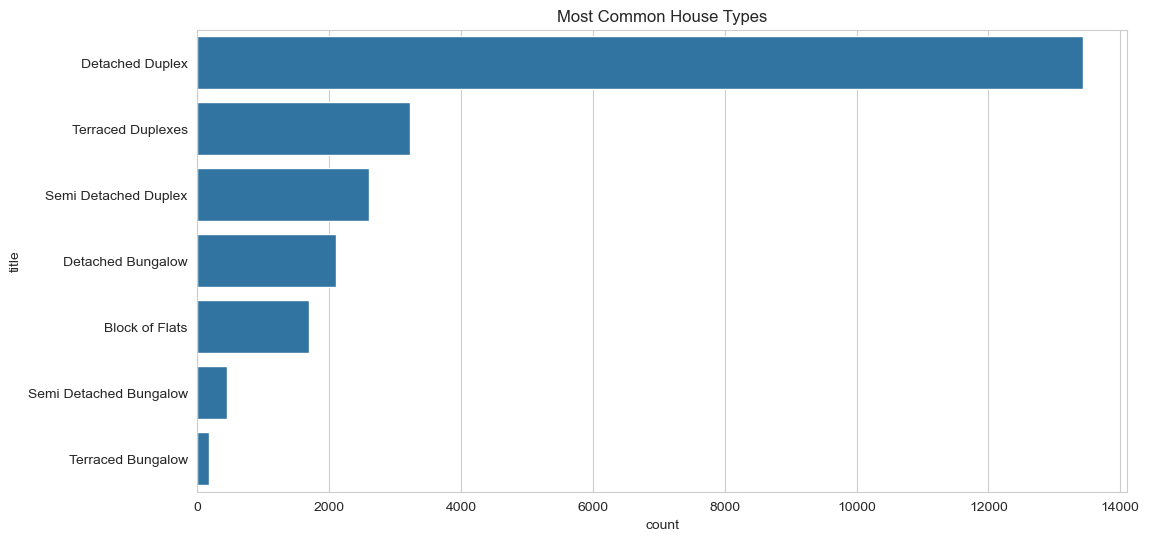

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data["title"], order=data["title"].value_counts().index)
plt.title("Most Common House Types")
plt.show()

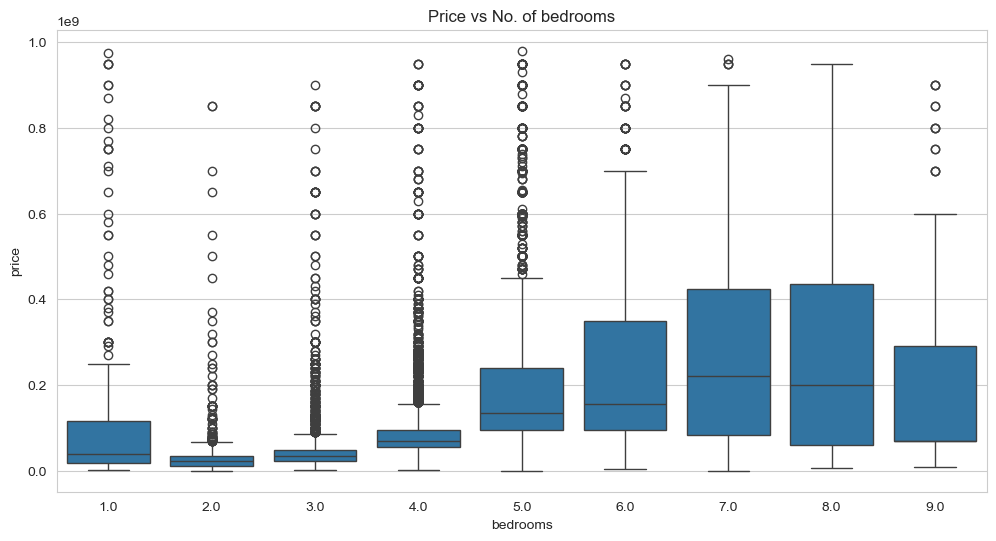

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="bedrooms", y="price", data=data)
plt.title("Price vs No. of bedrooms")
plt.show()

### Encoding Categorical Variables

In [31]:
data_encoded = pd.get_dummies(data, columns=["title", "town", "state"], drop_first=True)

In [32]:
data_encoded

,bedrooms,bathrooms,toilets,parking_space,price,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,450000000.0,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,5.0,5.0,4.0,800000000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,4.0,5.0,5.0,4.0,120000000.0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4.0,4.0,5.0,6.0,40000000.0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,4.0,4.0,5.0,2.0,75000000.0,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,15000000.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24322,4.0,5.0,5.0,4.0,25000000.0,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
24323,4.0,5.0,5.0,4.0,68000000.0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
24324,3.0,4.0,4.0,3.0,78000000.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
